# Modelos de Regresion Lineal
## Modelo con datos simulados
y = a + b * x
* x : 100 valores distribuidos segun una Normal (1.5, 2.5) 
* Ye = 7 + 1.8 * x (Y estimada)
* e estara distribuido segun una Normal (0, 0.8)

In [1]:
import pandas as pd
import numpy as np


In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 7 + 1.8 * x

In [5]:
y_act = 7 + 1.8 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
{
    "x": x_list,
    "y_actual": y_act_list,
    "y_prediccion": y_pred_list
})

In [8]:
data.head()

,x,y_actual,y_prediccion
0,1.612931,11.438866,9.903276
1,4.465017,15.662112,15.037030
2,0.699683,8.095857,8.259430
3,-3.292524,1.840284,1.073456
4,-1.816636,3.362658,3.730056


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range (1, len(x_list) + 1)]

Text(0.5,1,'Valor actual vs prediccion')

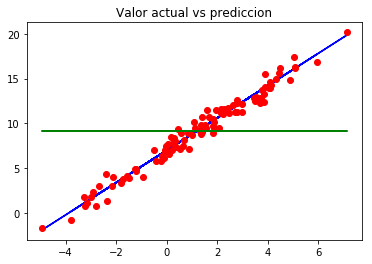

In [11]:
%matplotlib inline
plt.plot(x, y_pred, "b")
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor actual vs prediccion")

In [12]:
data["SSR"]= (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] =(data["y_prediccion"] - data["y_actual"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2 

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,1.612931,11.438866,9.903276,0.562748,2.358037,5.224679
1,4.465017,15.662112,15.037030,34.620511,0.390727,42.367093
2,0.699683,8.095857,8.259430,0.798666,0.026756,1.117786
3,-3.292524,1.840284,1.073456,65.280813,0.588025,53.477429
4,-1.816636,3.362658,3.730056,29.409522,0.134981,33.529344


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

1930.6031419846524

In [16]:
SSD

55.52879073928439

In [17]:
SST

1948.341381494462

In [18]:
R2 = SSR/SST

In [19]:
R2

0.9908957230605021

(array([ 4.,  5.,  9., 11., 18., 15., 14., 14.,  3.,  7.]),
 array([-1.68355798, -1.35528937, -1.02702077, -0.69875217, -0.37048356,
        -0.04221496,  0.28605364,  0.61432225,  0.94259085,  1.27085945,
         1.59912806]),
 <a list of 10 Patch objects>)

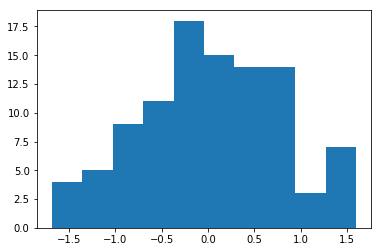

In [20]:

plt.hist((data["y_prediccion"] - data["y_actual"]))

### Obteniendo la recta de regresion
* y = a + b* x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_n - b * x_m

In [21]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.2130305777789143, 9.153110714928836)

In [24]:
data["beta_numerador"] = (data["x"]- x_mean) * (data["y_actual"]-y_mean)
data["beta_denominador"] = (data["x"]-x_mean)**2 #es la varianza de X



In [25]:
beta= sum(data["beta_numerador"])/sum(data["beta_denominador"])

In [26]:
beta

1.7824679813117843

In [27]:
alpha = y_mean - beta * x_mean

In [28]:
alpha

6.990922549685788

In [32]:
y = alpha + beta * data["x"]

In [33]:
#EL modelo lineal obtenido por regresion es y
y

0      9.865921
1     14.949672
2      8.238085
3      1.122104
4      3.752828
5     10.806360
6      9.424898
7      1.679040
8     -1.797578
9     10.247883
10    17.582773
11     2.785845
12     4.182585
13     6.786121
14     4.830634
15    10.289777
16    13.865571
17    13.728313
18     7.285686
19     3.182800
20     9.330594
21    11.302174
22     7.088415
23    10.314880
24     8.133795
25     8.936958
26     6.871707
27    11.921853
28     6.227051
29    12.300859
        ...    
70    13.192429
71     5.326898
72    13.120397
73    11.804061
74    16.022585
75     7.780489
76     7.988527
77    13.611550
78     9.759796
79     8.519462
80     7.429766
81    14.275734
82    13.309070
83     6.099446
84    11.067387
85     9.461897
86     7.626889
87     7.140505
88     4.756129
89    14.378991
90    15.692209
91     9.685426
92    10.304181
93    14.312310
94    14.699506
95     8.966987
96    14.976138
97     7.339050
98    13.901414
99     8.560574
Name: x, Length: 100, dt

In [35]:
data["y_model"] = alpha + beta * data["x"]

In [36]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_numerador,beta_denominador,y_model
0,1.612931,11.438866,9.903276,0.562748,2.358037,5.224679,-12.262763,0.914075,0.159921,9.865921
1,4.465017,15.662112,15.037030,34.620511,0.390727,42.367093,-14.533603,21.167182,10.575415,14.949672
2,0.699683,8.095857,8.259430,0.798666,0.026756,1.117786,-9.120839,0.542739,0.263526,8.238085
3,-3.292524,1.840284,1.073456,65.280813,0.588025,53.477429,-5.524845,32.948340,20.300024,1.122104
4,-1.816636,3.362658,3.730056,29.409522,0.134981,33.529344,-5.895642,17.543139,9.178877,3.752828


In [52]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD =sum((data["y_model"] - data["y_actual"])**2)
SST = sum((data["y_actual"] - y_mean)**2 )

In [53]:
SSR, SSD, SST

(1893.0878119034664, 55.25356959099521, 1948.3413814944627)

In [55]:
R2 = SSR/SST
R2

0.9716407144477862

Text(0.5,1,'Valor actual vs prediccion')

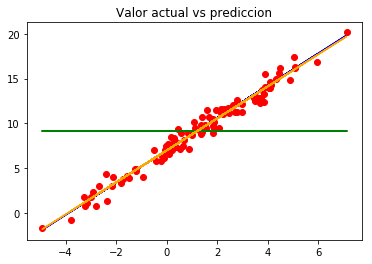

In [60]:
y_mean = [np.mean(y_act) for i in range (1, len(x_list) + 1)]
%matplotlib inline
plt.plot(x, y_pred, "b")
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.plot(data["x"], data["y_model"], "orange")
plt.title("Valor actual vs prediccion")


 ## Error estandar de los residuos (RSE)

In [62]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7508741136848386

In [63]:
np.mean(data["y_actual"])

9.153110714928836

### Sacar el porcentaje de error del modelo

In [65]:
# Porcentaje de error
RSE / np.mean(data["y_actual"])

0.08203485537000592